In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('result.csv')
data.head()

,Unnamed: 0,위도,경도,고도,지형유형,도로거리,토양 pH,전기전도도,y
0,0,36.818286,127.76592,142.363495,산림,413.0,5.7,0.3,1
1,1,35.366927,129.30050,31.588184,평지,357.0,5.4,0.7,1
2,2,35.297099,129.25260,11.790762,평지,111.0,5.6,0.8,1
3,3,35.297099,129.25260,11.790762,평지,111.0,5.6,0.8,1
4,4,35.602107,129.28892,91.715805,산림,349.0,5.7,1.2,1


In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data.head()

,위도,경도,고도,지형유형,도로거리,토양 pH,전기전도도,y
0,36.818286,127.76592,142.363495,산림,413.0,5.7,0.3,1
1,35.366927,129.30050,31.588184,평지,357.0,5.4,0.7,1
2,35.297099,129.25260,11.790762,평지,111.0,5.6,0.8,1
3,35.297099,129.25260,11.790762,평지,111.0,5.6,0.8,1
4,35.602107,129.28892,91.715805,산림,349.0,5.7,1.2,1


one-hot encoding

In [ ]:
data['지형유형'] = data['지형유형'].apply(lambda x: 1 if x == '산림' else 0)
data.head()

,위도,경도,고도,지형유형,도로거리,토양 pH,전기전도도,y
0,36.818286,127.76592,142.363495,1,413.0,5.7,0.3,1
1,35.366927,129.30050,31.588184,0,357.0,5.4,0.7,1
2,35.297099,129.25260,11.790762,0,111.0,5.6,0.8,1
3,35.297099,129.25260,11.790762,0,111.0,5.6,0.8,1
4,35.602107,129.28892,91.715805,1,349.0,5.7,1.2,1


model training&evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.6829268292682927
Precision: 0.7058823529411765
Recall: 0.9295774647887324
F1 Score: 0.8024316109422494

Confusion Matrix:
 [[  8  55]
 [ 10 132]]


In [ ]:

def predict_formatting(latitude, longitude, elevation, terrain_type, road_distance, soil_ph, electrical_conductivity):
    input_data = {
        '위도': [latitude],
        '경도': [longitude],
        '고도': [elevation],
        '지형유형': [terrain_type],  # 1 for '산림', 0 for '평지'
        '도로거리': [road_distance],
        '토양 pH': [soil_ph],
        '전기전도도': [electrical_conductivity]
    }
    input_df = pd.DataFrame(input_data)

    input_df['지형유형'] = input_df['지형유형'].apply(lambda x: 1 if x == '산림' else 0)

    prediction = model.predict(input_df)

    return prediction[0]

latitude_input = float(input("위도: "))
longitude_input = float(input("경도: "))
elevation_input = float(input("고도: "))
terrain_type_input = input("지형 유형(산림/평지): ")
road_distance_input = float(input("위험 요인(도로)까지의 거리(m): "))
soil_ph_input = float(input("토양 pH: "))
electrical_conductivity_input = float(input("전기전도도: "))

result = predict_formatting(latitude_input, longitude_input, elevation_input, terrain_type_input, road_distance_input, soil_ph_input, electrical_conductivity_input)

if result == 1:
    print("결과: 도롱뇽이 서식 가능한 환경입니다.")
else:
    print("결과: 도롱뇽이 서식하기 힘든 환경입니다.")

위도: 37.5246
경도: 126.9541
고도: 100
지형 유형(산림/평지): 산림
위험 요인(도로)까지의 거리(m): 900
토양 pH: 6
전기전도도: 1.2
결과: 도롱뇽이 서식 가능한 환경입니다.


In [ ]:
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("Intercept:", intercept)
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")


Intercept: -0.0319954830757972
위도: -0.26487318113939107
경도: 0.09045177377008316
고도: 0.000639740699626129
지형유형: 0.8284731784880103
도로거리: 0.00033489261373939594
토양 pH: -0.320279435594814
전기전도도: -0.10400310165288747


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

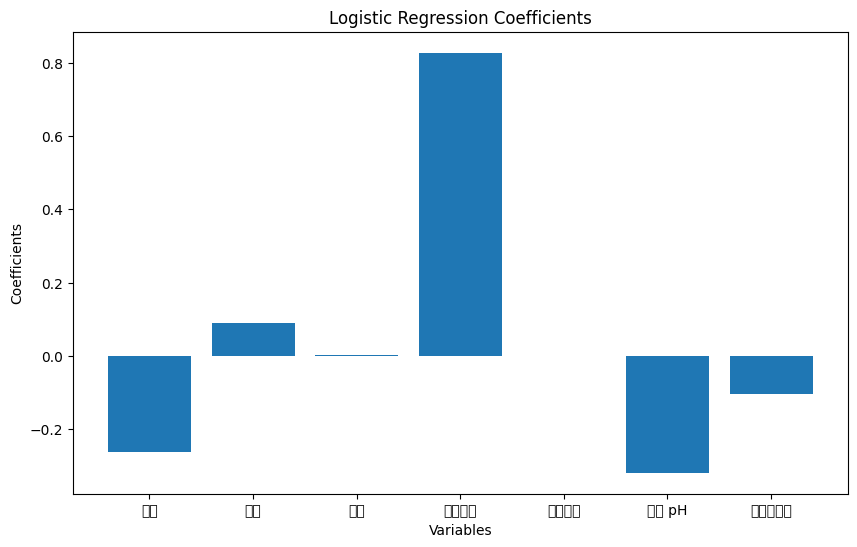

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients)
plt.xlabel("Variables")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Coefficients")
plt.show()